## Implementing *K*-Means 

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.io
import matplotlib.pyplot as plt

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set and want to group the data into a few cohesive "clusters".

The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

### Finding Closest Centroids

In the "cluster assignment" phase of the K-means algorithm, the algorithm assigns every training example x(i) to its closest centroid, given the current positions of centroids.

In [2]:
#Defining Function to find Closest Centroid
def findClosestCentroids(X, centroids):
    K = np.size(centroids, 1)
    idx = []
    for i in range(len(X)):
        norm = np.sum(((X[i] - centroids)**2), axis=1)
        idx.append(norm.argmin())
    return idx

### Computing Centroid Means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it.

In [3]:
#Defining Function to compute Centroid Means
def computeCentroids(X, idx, K):
    centroid = np.zeros((K,np.size(X,1)))
    aug_X = np.hstack((np.array(idx)[:,None],X))
    for i in range(K):
        centroid[i] = np.mean(X[aug_X[:,0] == i], axis=0)
    return centroid

#### Defining other Functions

In [4]:
#Defining Function to display data for visualization
def displayData(X):
    num_images = len(X)
    rows = int(num_images**.5)
    cols = int(num_images**.5)
    fig, ax = plt.subplots(rows,cols,sharex=True,sharey=True)
    img_num = 0
    for i in range(rows):
        for j in range(cols):
            # Convert column vector into 32x232 pixel matrix
            # transpose to display correctly
            img = X[img_num,:].reshape(32,32).T
            ax[i][j].imshow(img,cmap='gray')
            img_num += 1
    return (fig, ax)

In [5]:
#Defining function for running K-Means for optimization
def runKMeans(X, initial_centroids, max_iters, plot_progress=False):
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids 
    previous_centroids = centroids
    for i in range(max_iters):
    # Centroid assignment
        idx = findClosestCentroids(X, centroids)
        if plot_progress:
            plt.plot(X[:,0],X[:,1], 'bo')
            plt.plot(centroids[:,0], centroids[:,1], 'rx')
            plt.plot(previous_centroids[:,0], previous_centroids[:,1], 'gx')
            plt.show()
            previous_centroids = centroids
            centroids = computeCentroids(X, idx, K)
    return (centroids, idx)

### Initializing Random Centroids to start with

In [6]:
def kMeansInitCentroids(X, K):
    return X[np.random.choice(X.shape[0], K)]

#### Importing Dataset

In [7]:
# Find Closest Centroids
raw_mat = scipy.io.loadmat("ex7data2.mat")
X = raw_mat.get("X")

In [8]:
# Select an initial set of centroids
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)

In [9]:
#Compute Means
centroids = computeCentroids(X, idx, K)

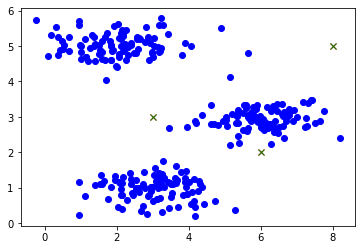

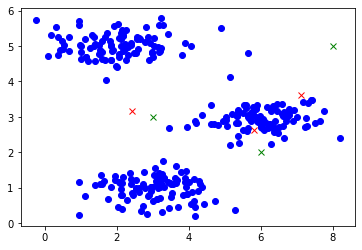

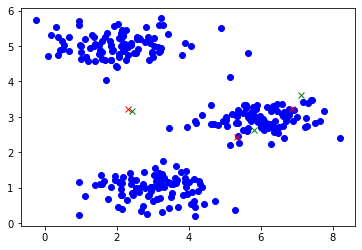

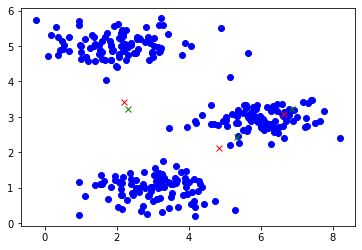

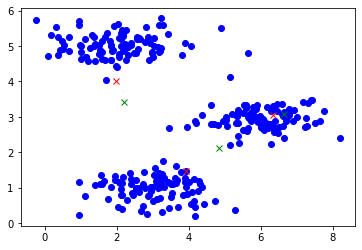

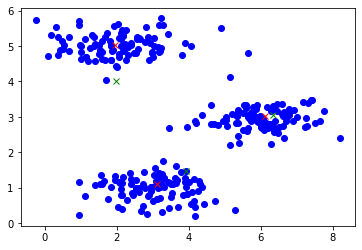

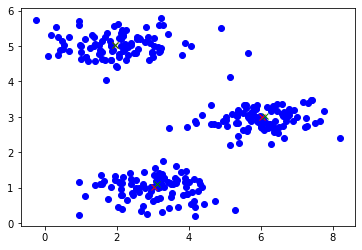

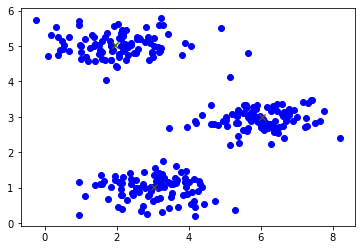

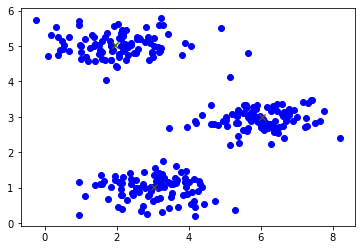

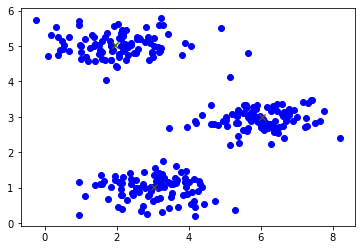

In [10]:
# K-means Clustering
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
centroids, idx = runKMeans(X, initial_centroids, max_iters, plot_progress=True)

We can see over 10 iterations, we were able to optimize the solution by finding 3 different clusters for given dataset.

### Running *K*-Means on pixel set (Image Compression with *K*-Means)

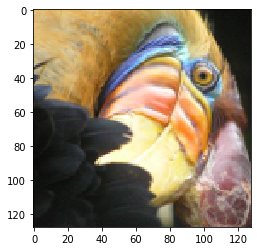

In [11]:
#  K-means Clustering on Pixels
A = plt.imread("bird_small.png")
plt.imshow(A)
plt.show()

This creates a three-dimensional matrix A whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, A(50, 33, 3) gives the blue intensity of the pixel at row 50 and column 33.

In [12]:
original_shape = np.shape(A)
print(original_shape)

(128, 128, 3)


After finding the top K = 16 colors to represent the image, you can now assign each pixel position to its closest centroid using the findClosestCentroids function. This allows you to represent the original image using the centroid assignments of each pixel. Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required 24 bits for each one of the 128x128 pixel locations, resulting in total size of 128x128x24 = 393216 bits. The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits used is therefore 16 x 24 + 128 x 128 x 4 = 65920 bits, which corresponds to compressing the original image by about a factor of 6.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


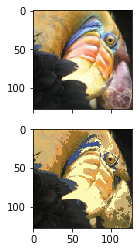

In [13]:
# Reshape A to get R, G, B values for each pixel
X = A.reshape((np.size(A, 0)*np.size(A, 1), 3))
K = 16
max_iters = 10

# Initialize centroids
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, max_iters, plot_progress=False)

# Image Compression
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[idx,:]
X_recovered = X_recovered.reshape(original_shape)

# Display 
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.imshow(A)
ax2.imshow(X_recovered)
f.show()